In [5]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('data.csv')

# 2. Show basic info
print("Basic Information:")
df.info()

# 3. Display the first 5 rows
print("\nFirst 5 Rows:")
print(df.head())

# 4. Print the number of missing values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Director            50000 non-null  object 
 3   Duration            50000 non-null  int64  
 4   Rating              50000 non-null  float64
 5   Votes               50000 non-null  int64  
 6   Description         50000 non-null  object 
 7   Language            50000 non-null  object 
 8   Country             50000 non-null  object 
 9   Budget_USD          50000 non-null  int64  
 10  BoxOffice_USD       50000 non-null  int64  
 11  Genre               50000 non-null  object 
 12  Production_Company  50000 non-null  object 
 13  Content_Rating      50000 non-null  object 
 14  Lead_Actor          50000 non-null  object 
 15  Num_Awards          50000 non-null

Descriptive Statistics (Numeric Columns):
               Year     Duration        Rating          Votes    Budget_USD  \
count  50000.000000  50000.00000  50000.000000   50000.000000  5.000000e+04   
mean    2001.562620    130.07312      6.926472  249699.050540  9.179143e+07   
std       12.722539     29.11097      1.698758  144314.043032  5.823888e+07   
min     1980.000000     80.00000      4.000000     516.000000  1.135566e+06   
25%     1991.000000    105.00000      5.500000  124531.500000  4.389040e+07   
50%     2002.000000    130.00000      6.900000  248582.000000  8.062480e+07   
75%     2013.000000    155.00000      8.400000  374833.500000  1.475557e+08   
max     2023.000000    180.00000      9.900000  499984.000000  1.984445e+08   

       BoxOffice_USD    Num_Awards  Critic_Reviews  
count   5.000000e+04  50000.000000    50000.000000  
mean    5.176063e+08      9.964440      500.176380  
std     2.880283e+08      6.066303      289.971792  
min     3.291117e+06      0.000000

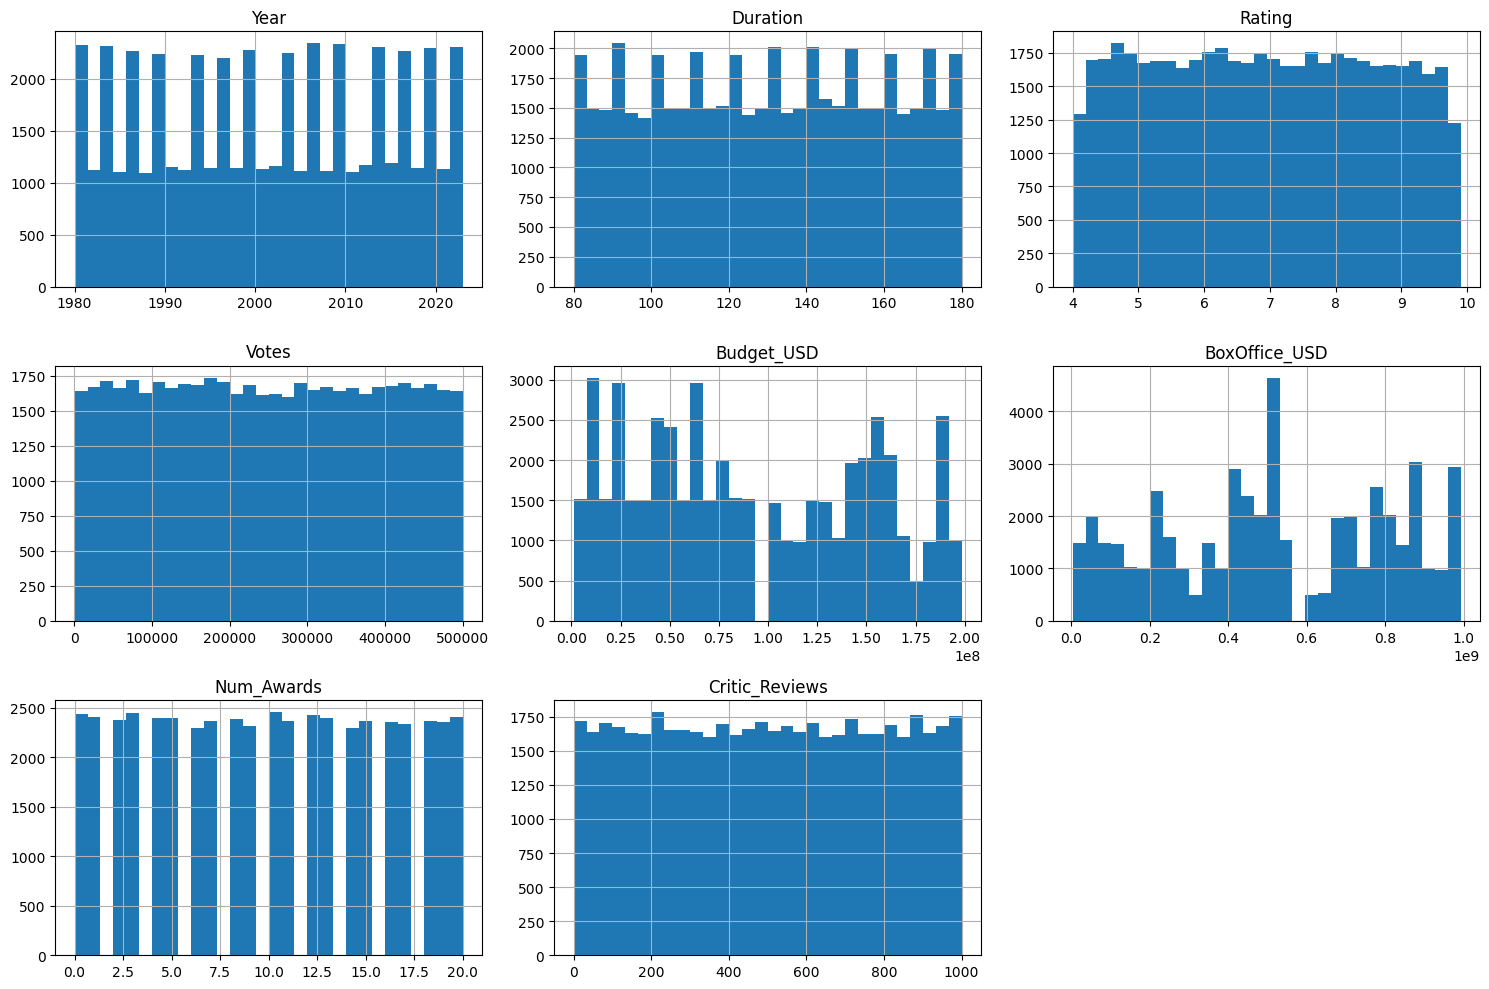

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# 1. Descriptive statistics for numeric columns
print("Descriptive Statistics (Numeric Columns):")
print(df.describe())

# 2. Number of unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# 3. Plot histograms for numeric columns
print("\nGenerating histograms...")
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# 1. Check and remove duplicate rows
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Removed {initial_shape[0] - df.shape[0]} duplicate rows.")

# 2. Fill missing values in numeric columns with column means
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 3. Confirm that no missing values remain
print("\nRemaining Missing Values per Column:")
print(df.isnull().sum())


Removed 0 duplicate rows.

Remaining Missing Values per Column:
Title                 0
Year                  0
Director              0
Duration              0
Rating                0
Votes                 0
Description           0
Language              0
Country               0
Budget_USD            0
BoxOffice_USD         0
Genre                 0
Production_Company    0
Content_Rating        0
Lead_Actor            0
Num_Awards            0
Critic_Reviews        0
dtype: int64


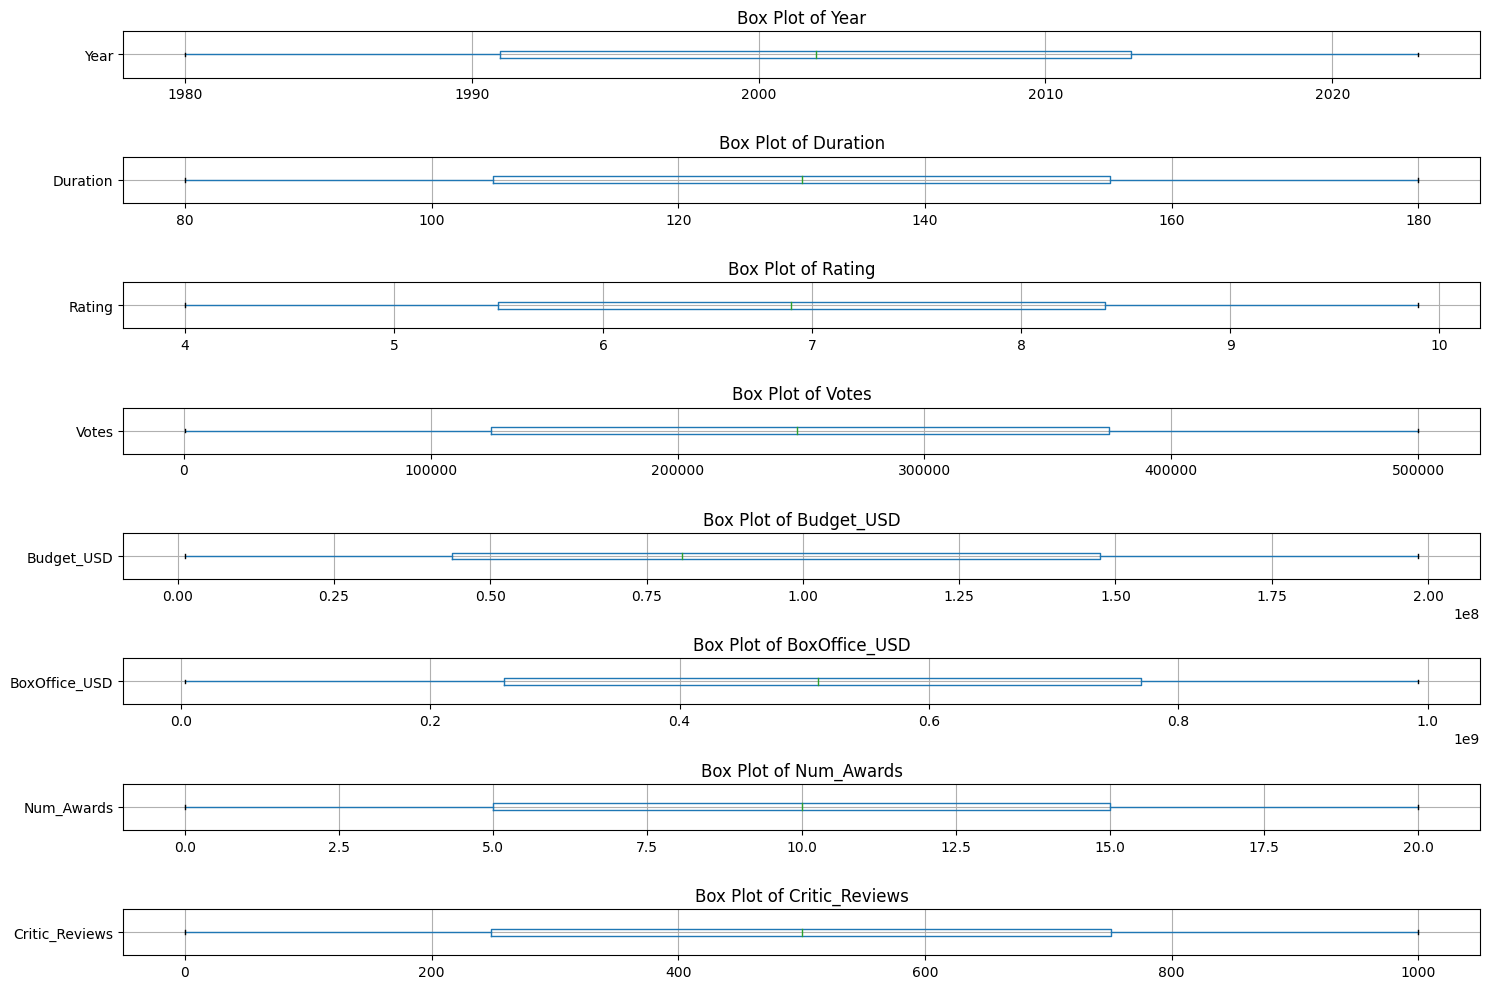

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    df.boxplot(column=col, vert=False)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()


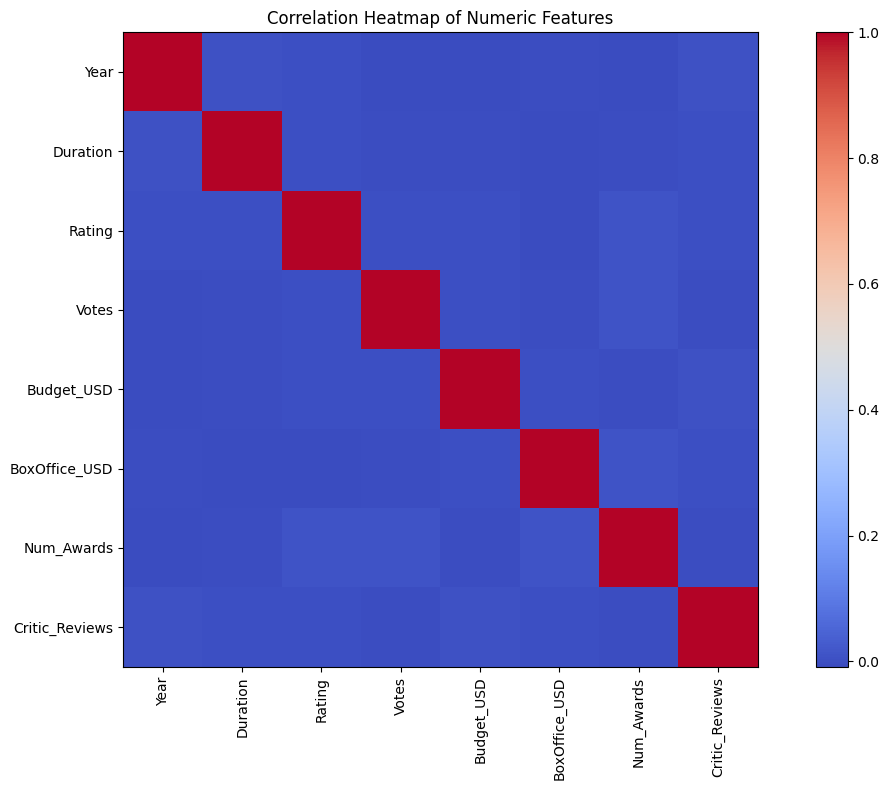

Top 5 features most correlated with 'BoxOffice_USD':
Num_Awards        0.010095
Duration          0.007254
Rating            0.005795
Votes             0.004112
Critic_Reviews    0.002197
Name: BoxOffice_USD, dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# 1. Compute correlation matrix for numeric variables
corr_matrix = df.corr(numeric_only=True)

# 2. Plot a heatmap using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# 3. Print the top 5 features most correlated with 'BoxOffice_USD'
if 'BoxOffice_USD' in corr_matrix.columns:
    correlations = corr_matrix['BoxOffice_USD'].drop('BoxOffice_USD').abs()
    top_5 = correlations.sort_values(ascending=False).head(5)
    print("Top 5 features most correlated with 'BoxOffice_USD':")
    print(top_5)
else:
    print("'BoxOffice_USD' column not found in the dataset.")



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('data.csv')

# Drop rows with missing values in relevant columns
df = df[['Budget_USD', 'BoxOffice_USD']].dropna()

# 1. Prepare the data
X = df[['Budget_USD']]  # Independent variable
y = df['BoxOffice_USD']  # Target variable

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# 2. Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: -0.0002
Mean Squared Error: 83668160332656464.00


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('data.csv')

# Define features and target
features = ['Year', 'Duration', 'Rating', 'Votes', 'Budget_USD', 'Num_Awards', 'Critic_Reviews']
target = 'BoxOffice_USD'

# Drop rows with missing values in any of the selected columns
df_model = df[features + [target]].dropna()

# Split data into X (features) and y (target)
X = df_model[features]
y = df_model[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multivariable linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: -0.0006
Mean Squared Error: 83701652482940288.00


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('data.csv')

# Define features and target
features = ['Year', 'Duration', 'Rating', 'Votes', 'Budget_USD', 'Num_Awards', 'Critic_Reviews']
target = 'BoxOffice_USD'

# Drop rows with missing values
df_model = df[features + [target]].dropna()

# Split into input features and target variable
X = df_model[features]
y = df_model[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Apply 2nd-degree polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. Fit Linear Regression model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 3. Predict and evaluate
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Corrected print statements
print(f"R² Score (Polynomial Degree 2): {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")



R² Score (Polynomial Degree 2): -0.0006
Mean Squared Error: 83707785777934400.00


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('data.csv')

# Define features and target
features = ['Year', 'Duration', 'Rating', 'Votes', 'Budget_USD', 'Num_Awards', 'Critic_Reviews']
target = 'BoxOffice_USD'

# Drop rows with missing values
df_model = df[features + [target]].dropna()

# Define X and y
X = df_model[features]
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Apply 2nd-degree polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. Fit Ridge Regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# 3. Predict and evaluate
y_pred = ridge_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score (Ridge, Polynomial Degree 2): {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.60386e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R² Score (Ridge, Polynomial Degree 2): -0.0006
Mean Squared Error: 83706400328150944.00


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv('data.csv')

# Define features and target
features = ['Year', 'Duration', 'Rating', 'Votes', 'Budget_USD', 'Num_Awards', 'Critic_Reviews']
target = 'BoxOffice_USD'

# Drop missing values
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Apply 2nd-degree polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. Use GridSearchCV to find the best alpha for Ridge Regression
alphas = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid = GridSearchCV(ridge, alphas, cv=5)
grid.fit(X_train_poly, y_train)

# 3. Predict and evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Best alpha: {grid.best_params_['alpha']}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")



/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.44969e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.44169e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.48978e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.36267e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.44363e-37): res

Best alpha: 100
R² Score: -0.0007
Mean Squared Error: 83709419557543904.00
